In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib import font_manager, rc
font_path='C:\Windows\Fonts/malgun.ttf'
font=font_manager.FontProperties(fname=font_path).get_name() # 폰트 적용
rc('font',family=font)

In [2]:
s2021=pd.read_csv('서울시데이터/서울시2021.csv',encoding='utf-8')
s2020=pd.read_csv('서울시데이터/서울시2020.csv',encoding='utf-8')
s2019=pd.read_csv('서울시데이터/서울시2019.csv',encoding='utf-8')
s2018=pd.read_csv('서울시데이터/서울시2018.csv',encoding='utf-8')
s2017=pd.read_csv('서울시데이터/서울시2017.csv',encoding='utf-8')
s2016=pd.read_csv('서울시데이터/서울시2016.csv',encoding='utf-8')

In [3]:
s2021.columns[:33]

Index(['기준_년_코드', '기준_분기_코드', '상권_구분_코드', '상권_구분_코드_명', '상권_코드', '상권_코드_명',
       '서비스_업종_코드', '서비스_업종_코드_명', '분기당_매출_금액', '분기당_매출_건수', '주중_매출_비율',
       '주말_매출_비율', '월요일_매출_비율', '화요일_매출_비율', '수요일_매출_비율', '목요일_매출_비율',
       '금요일_매출_비율', '토요일_매출_비율', '일요일_매출_비율', '시간대_00~06_매출_비율',
       '시간대_06~11_매출_비율', '시간대_11~14_매출_비율', '시간대_14~17_매출_비율',
       '시간대_17~21_매출_비율', '시간대_21~24_매출_비율', '남성_매출_비율', '여성_매출_비율',
       '연령대_10_매출_비율', '연령대_20_매출_비율', '연령대_30_매출_비율', '연령대_40_매출_비율',
       '연령대_50_매출_비율', '연령대_60_이상_매출_비율'],
      dtype='object')

In [4]:
slice2021=s2021.iloc[:,:33]
slice2020=s2020.iloc[:,:33]
slice2019=s2019.iloc[:,:33]
slice2018=s2018.iloc[:,:33]
slice2017=s2017.iloc[:,:33]
slice2016=s2016.iloc[:,:33]

In [5]:
slice2021['서비스_업종_코드_명'].unique()

array(['전자상거래업', '인테리어', '가전제품', '가구', '화초', '섬유제품', '완구', '운동/경기용품',
       '화장품', '문구', '의약품', '시계및귀금속', '안경', '가방', '신발', '일반의류', '반찬가게',
       '핸드폰', '컴퓨터및주변장치판매', '편의점', '슈퍼마켓', '피부관리실', '네일숍', '미용실', '스포츠클럽',
       '치과의원', '일반의원', '커피-음료', '분식전문점', '패스트푸드점', '제과점', '양식음식점',
       '일식음식점', '중식음식점', '한식음식점', '의료기기', '육류판매', '노래방', '고시원', '여관',
       '세탁소', '자동차수리', 'PC방', '골프연습장', '당구장', '한의원', '스포츠 강습', '호프-간이주점',
       '치킨전문점', '조명용품', '철물점', '애완동물', '서적', '청과상', '수산물판매', '미곡판매',
       '가전제품수리', '예술학원', '외국어학원', '일반교습학원', '자동차미용', '자전거 및 기타운송장비',
       '부동산중개업'], dtype=object)

In [6]:
# 1분기 데이터만 추출하고, 요일, 시간별, 연령별 매출 비율 비교
q1_2021=slice2021.loc[slice2021['기준_분기_코드']==1] # 분기가 1인 데이터만 가져옴
q1_2021.drop(['기준_년_코드','상권_구분_코드','상권_코드','서비스_업종_코드'],axis=1) # 필요없는 데이터 제거

,기준_분기_코드,상권_구분_코드_명,상권_코드_명,서비스_업종_코드_명,분기당_매출_금액,분기당_매출_건수,주중_매출_비율,주말_매출_비율,월요일_매출_비율,화요일_매출_비율,...,시간대_17~21_매출_비율,시간대_21~24_매출_비율,남성_매출_비율,여성_매출_비율,연령대_10_매출_비율,연령대_20_매출_비율,연령대_30_매출_비율,연령대_40_매출_비율,연령대_50_매출_비율,연령대_60_이상_매출_비율
32378,1,관광특구,강남 마이스 관광특구,전자상거래업,5.246740e+05,5,0,100,0,0,...,0,0,0,100,0,0,100,0,0,0
32379,1,관광특구,강남 마이스 관광특구,가전제품,2.403139e+09,8727,65,35,11,9,...,37,1,41,42,1,16,21,15,18,13
32380,1,관광특구,강남 마이스 관광특구,가구,1.176752e+10,6378,52,48,11,7,...,24,0,43,57,0,2,12,35,22,29
32381,1,관광특구,강남 마이스 관광특구,화초,4.073456e+08,11502,68,32,11,15,...,34,2,53,27,0,11,33,22,10,4
32382,1,관광특구,강남 마이스 관광특구,섬유제품,8.173143e+08,27705,54,46,10,10,...,47,3,20,80,3,45,19,18,14,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64733,1,골목상권,계동길,제과점,1.656883e+08,18512,76,24,14,16,...,27,4,37,45,1,11,19,18,16,17
64734,1,골목상권,계동길,양식음식점,1.994485e+08,4442,54,46,8,10,...,48,2,40,43,0,28,25,9,15,6
64735,1,골목상권,계동길,일식음식점,6.032547e+07,1563,84,16,14,16,...,30,25,30,36,0,8,19,16,16,7
64736,1,골목상권,계동길,중식음식점,3.979185e+07,2042,68,32,14,12,...,35,1,39,49,10,33,15,13,12,5


전자상거래업


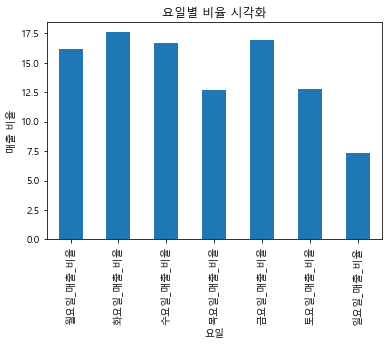

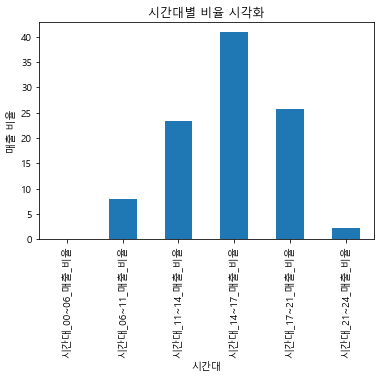

가전제품


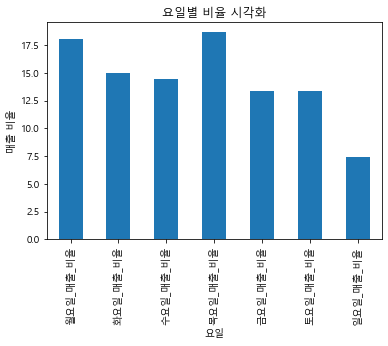

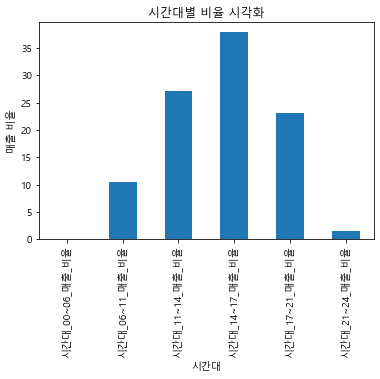

가구


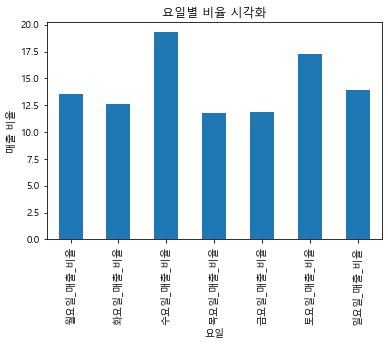

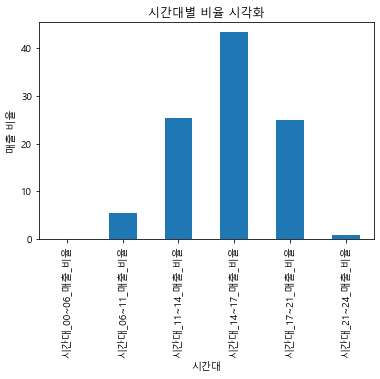

화초


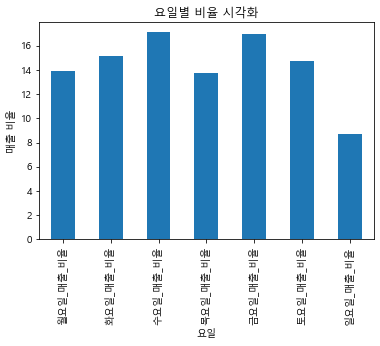

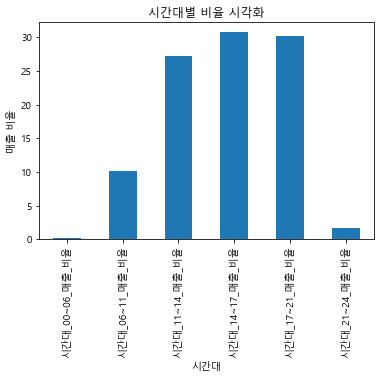

섬유제품


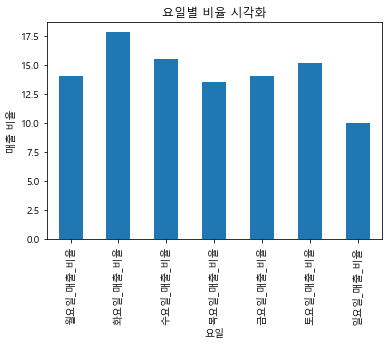

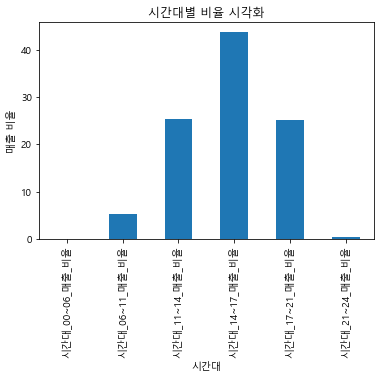

완구


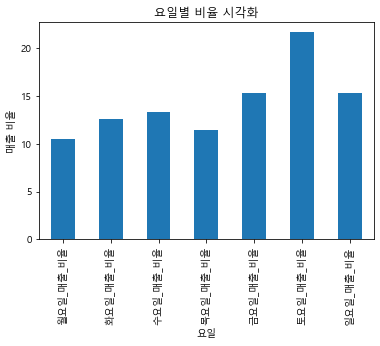

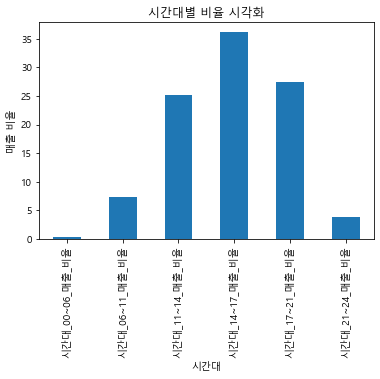

운동/경기용품


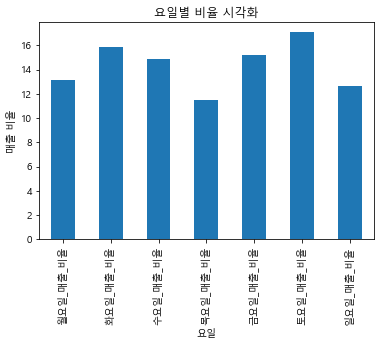

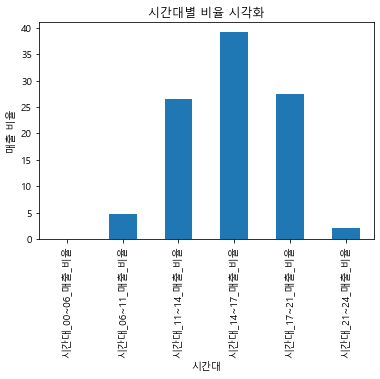

화장품


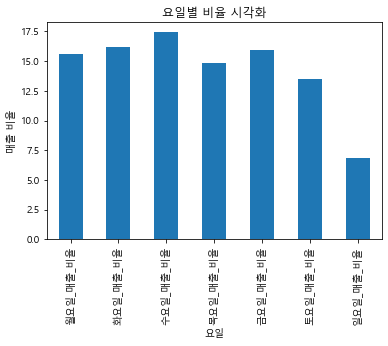

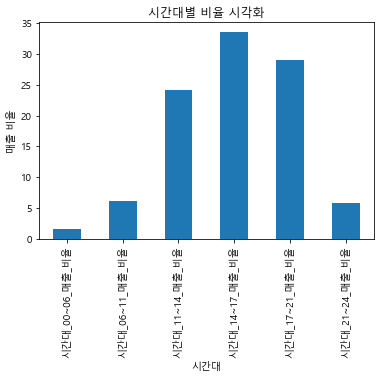

문구


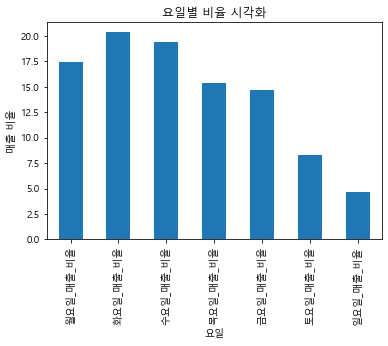

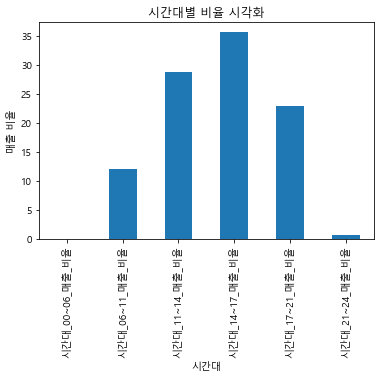

의약품


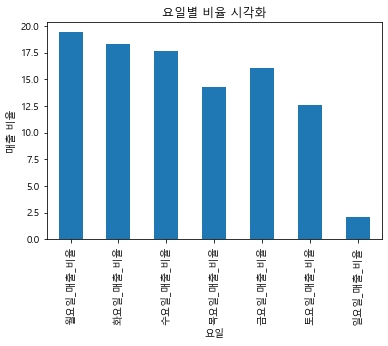

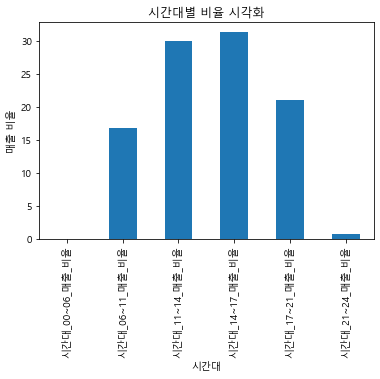

시계및귀금속


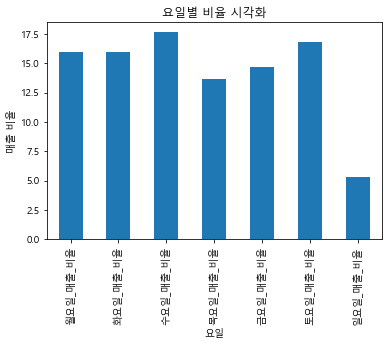

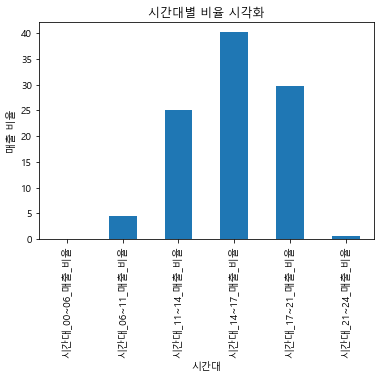

안경


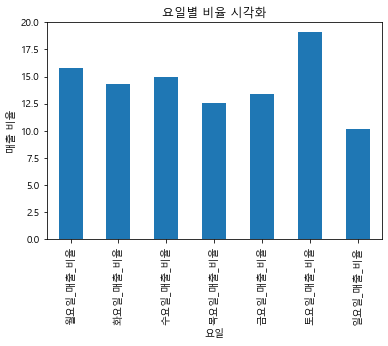

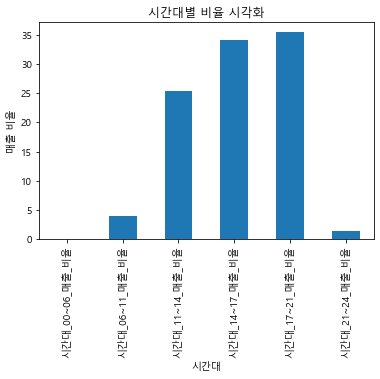

가방


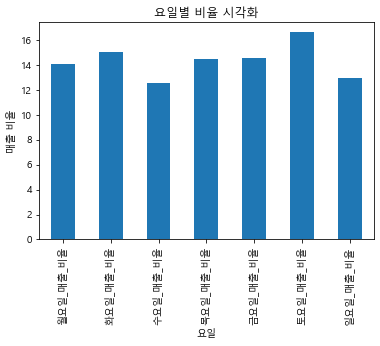

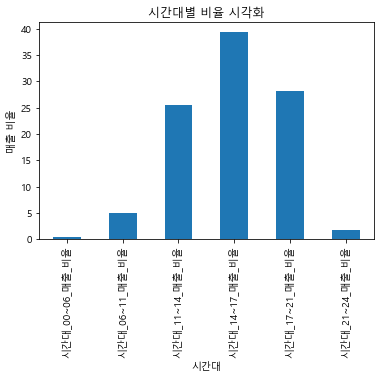

신발


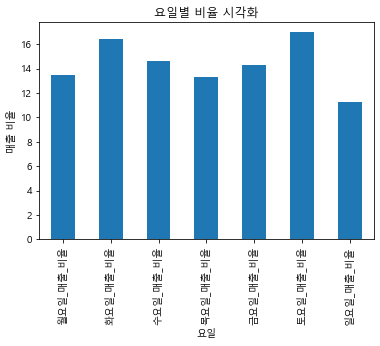

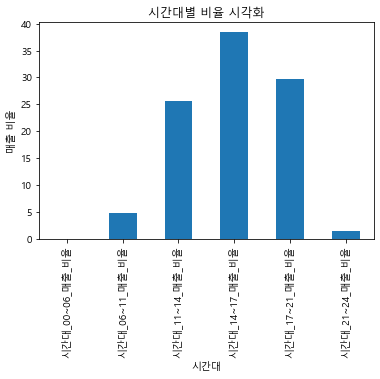

일반의류


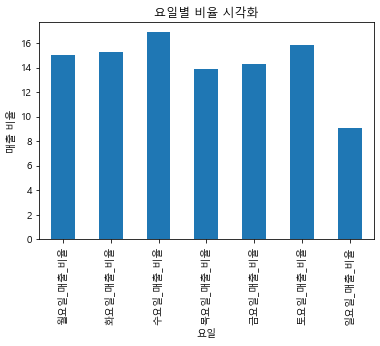

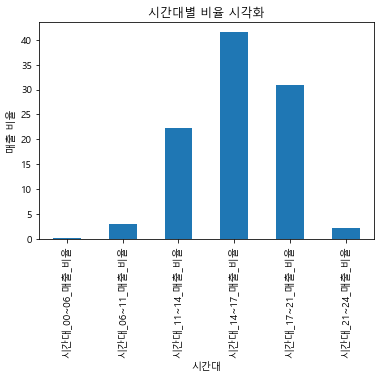

반찬가게


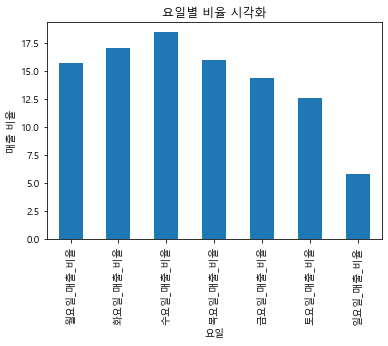

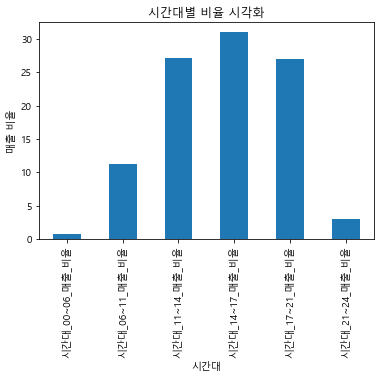

핸드폰


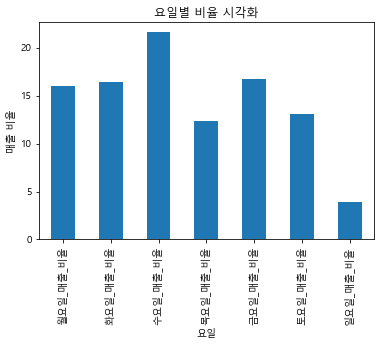

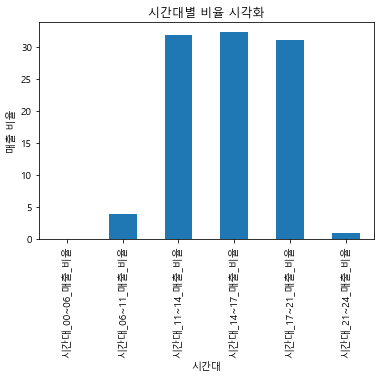

컴퓨터및주변장치판매


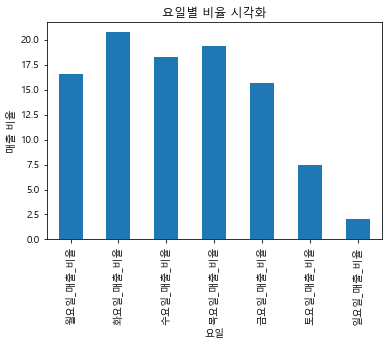

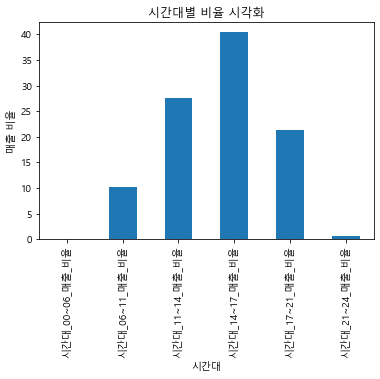

편의점


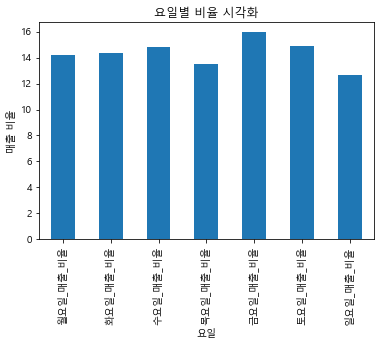

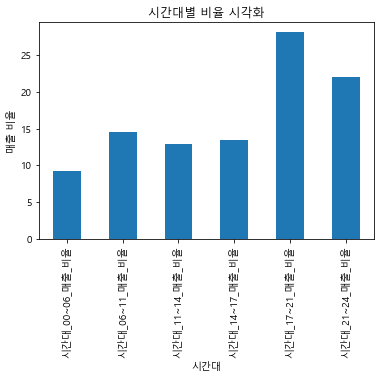

슈퍼마켓


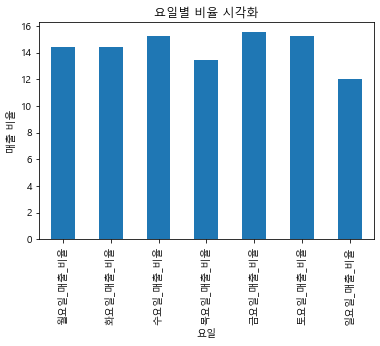

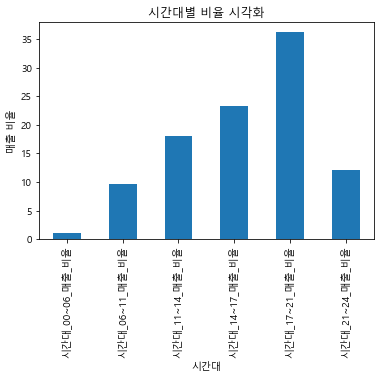

피부관리실


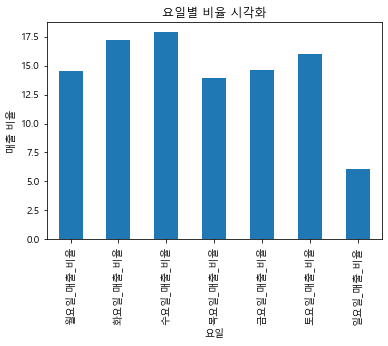

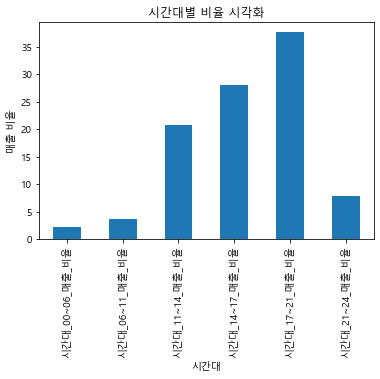

네일숍


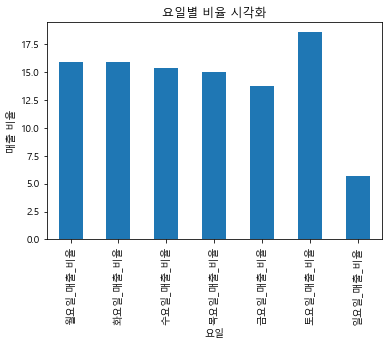

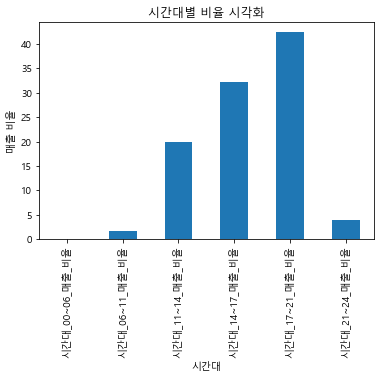

미용실


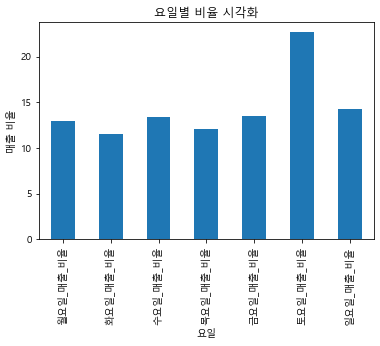

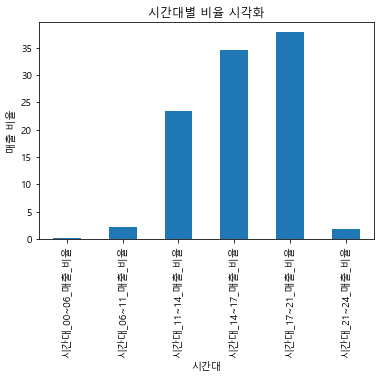

스포츠클럽


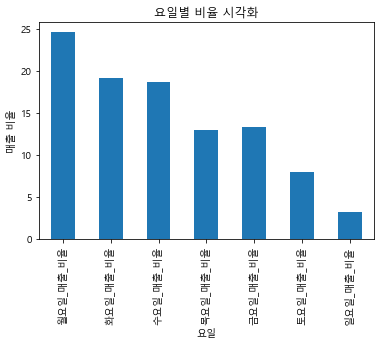

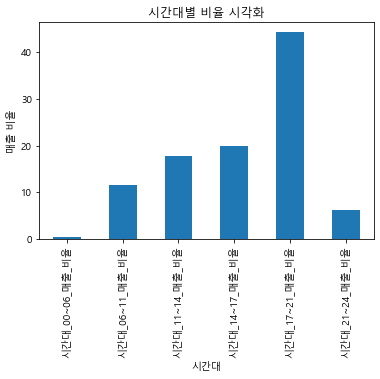

치과의원


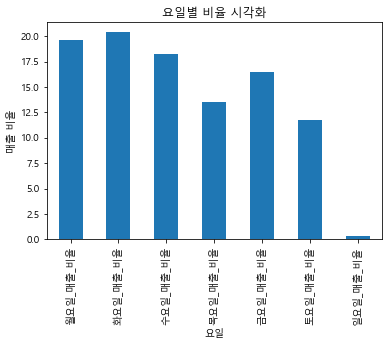

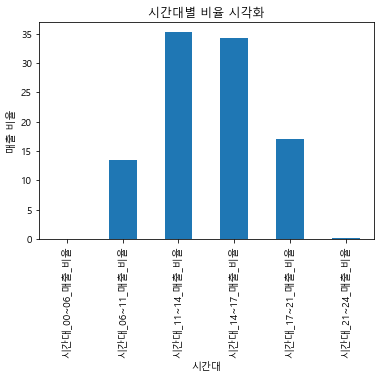

일반의원


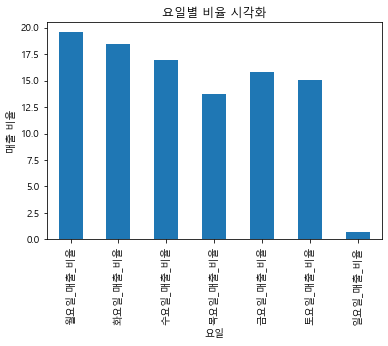

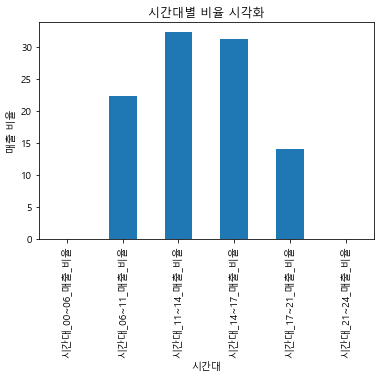

커피-음료


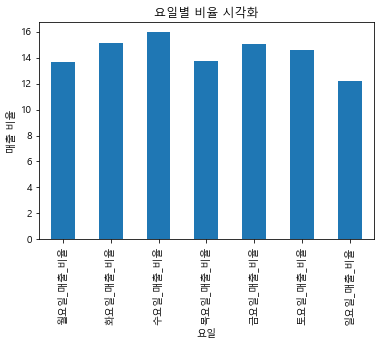

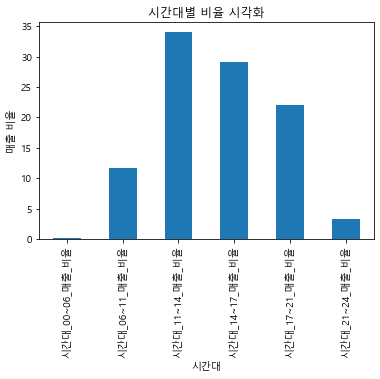

분식전문점


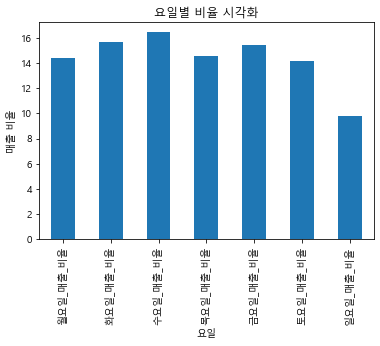

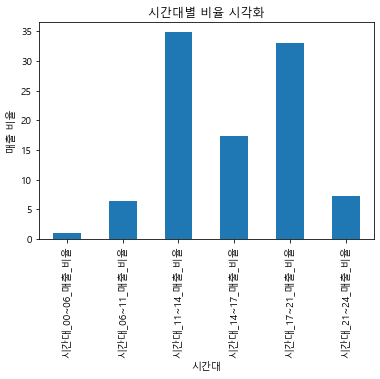

패스트푸드점


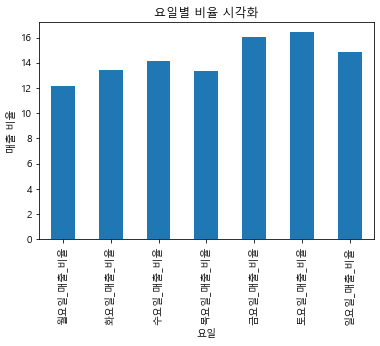

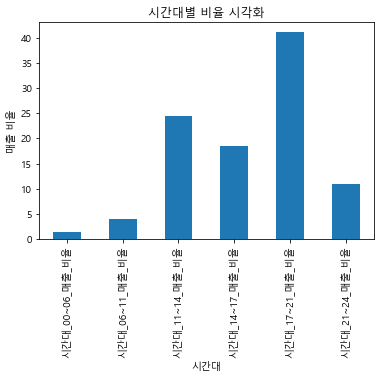

제과점


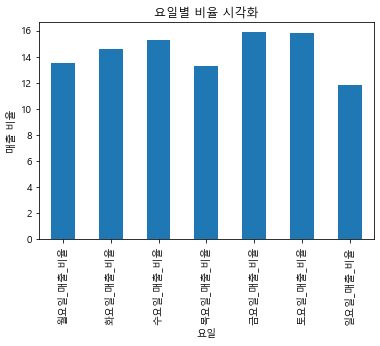

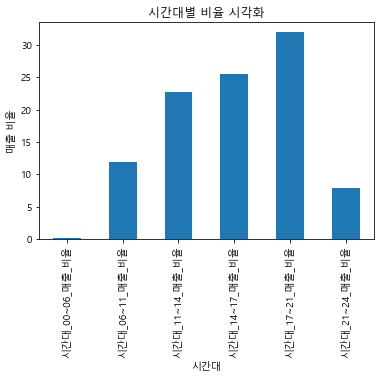

양식음식점


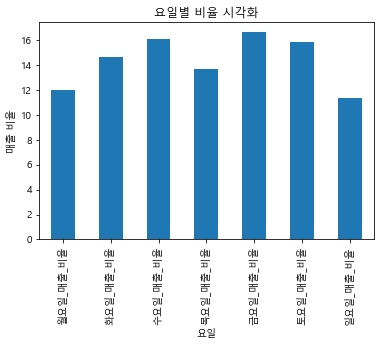

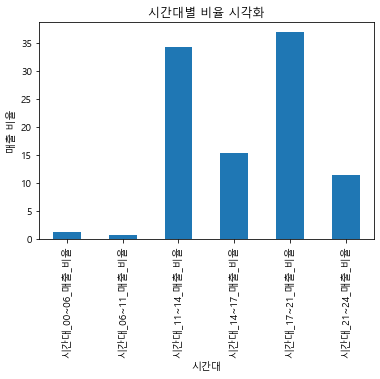

일식음식점


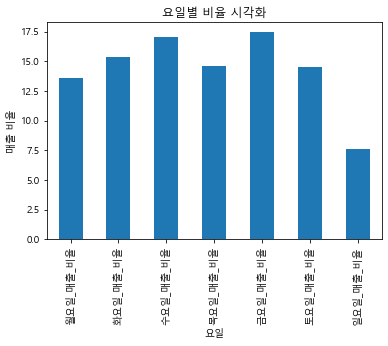

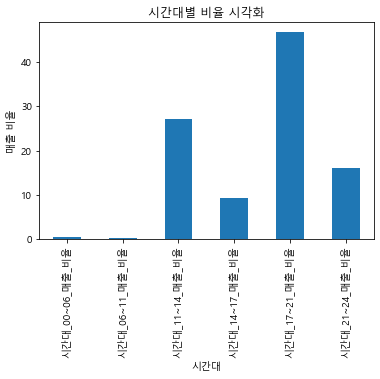

중식음식점


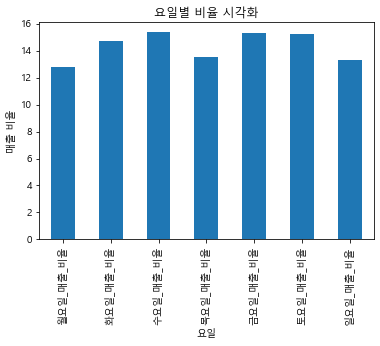

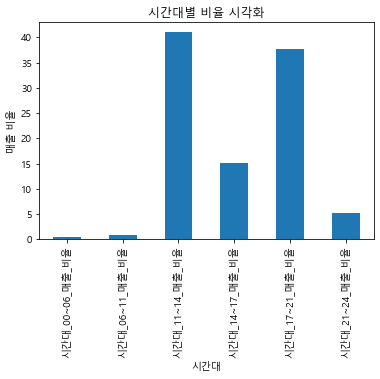

한식음식점


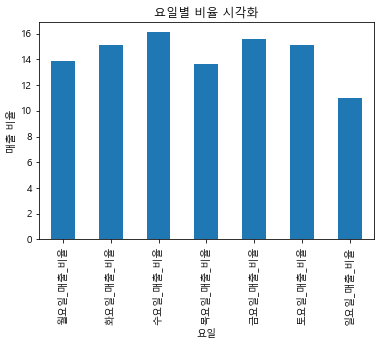

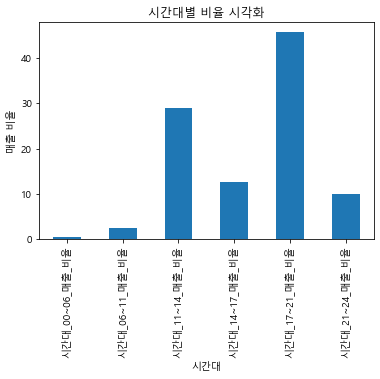

인테리어


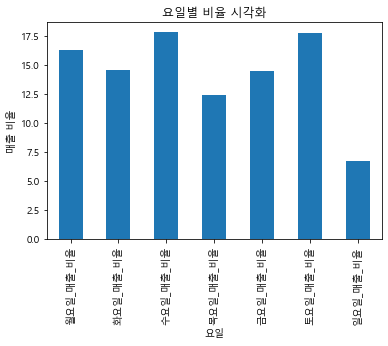

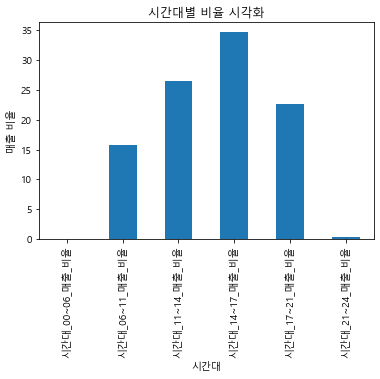

의료기기


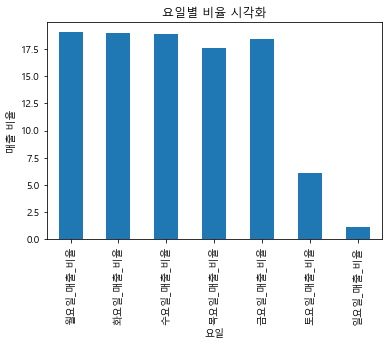

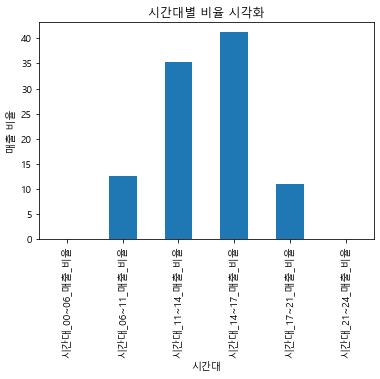

육류판매


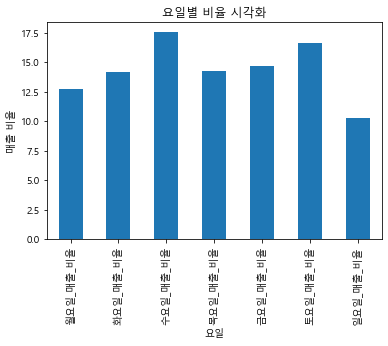

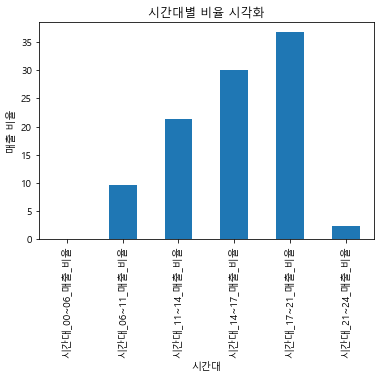

노래방


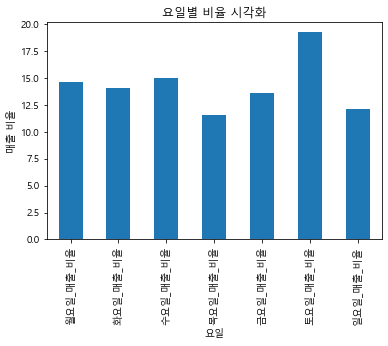

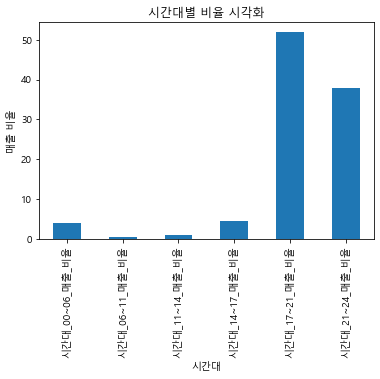

고시원


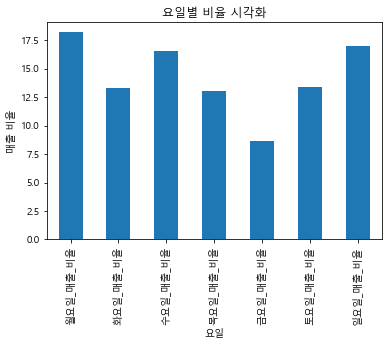

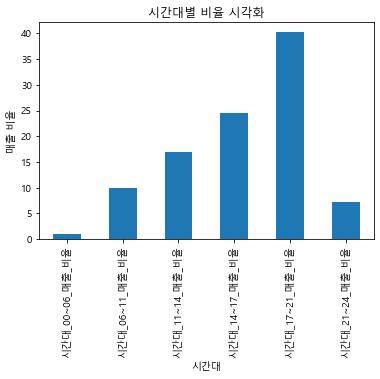

여관


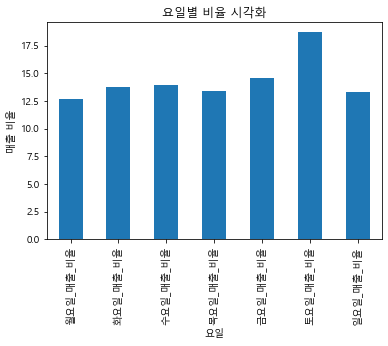

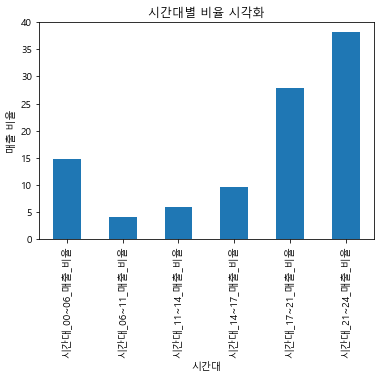

세탁소


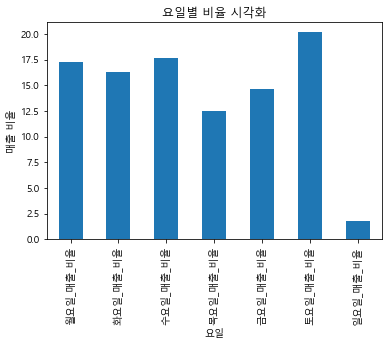

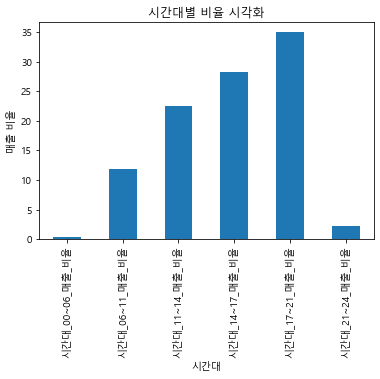

자동차수리


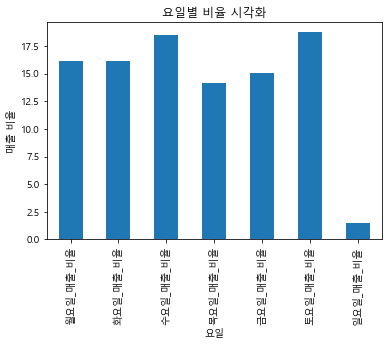

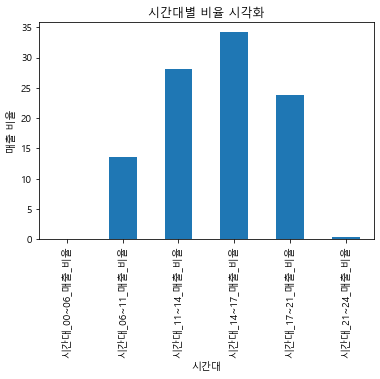

PC방


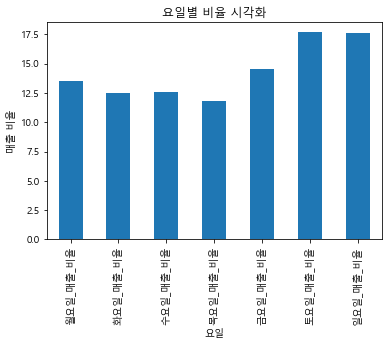

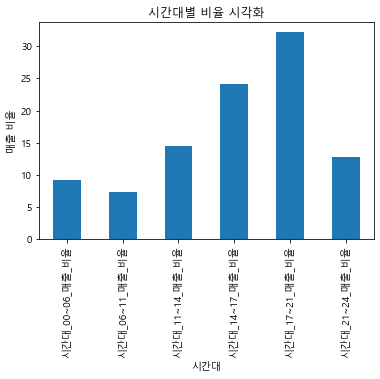

골프연습장


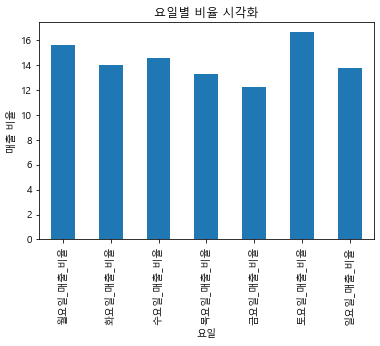

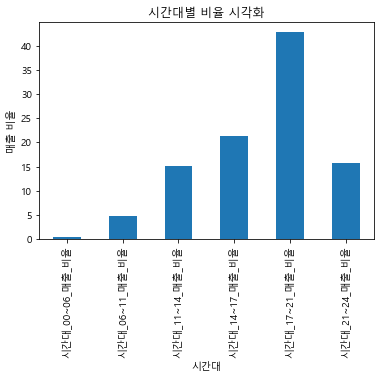

당구장


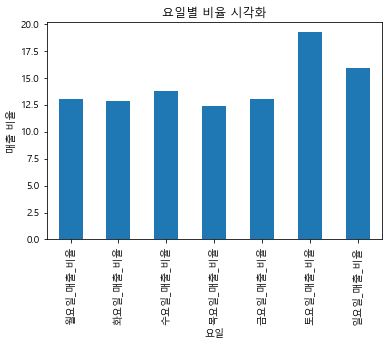

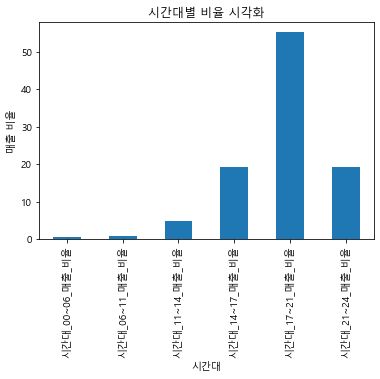

한의원


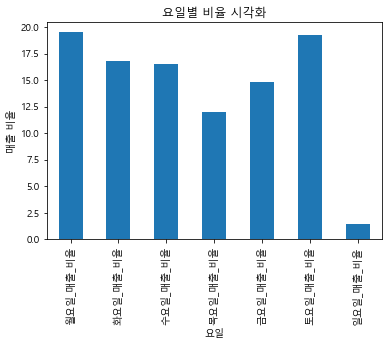

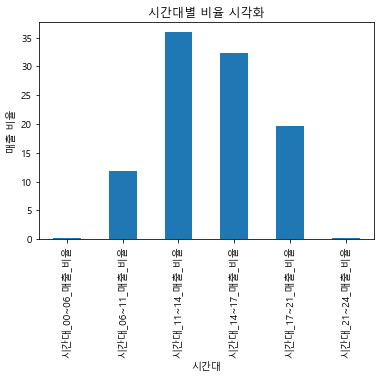

스포츠 강습


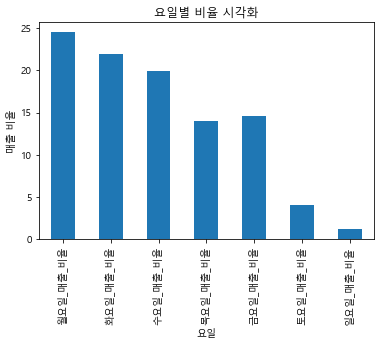

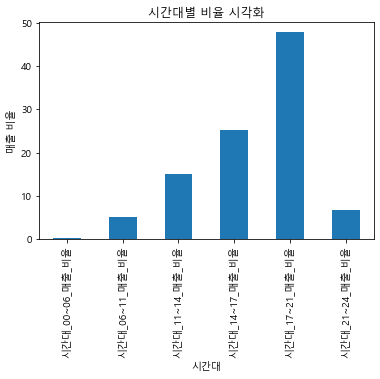

호프-간이주점


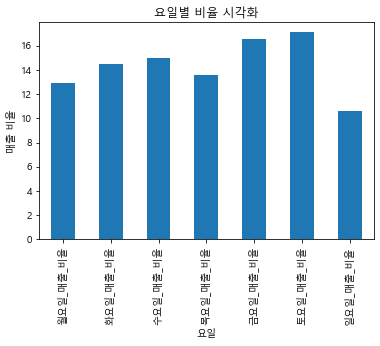

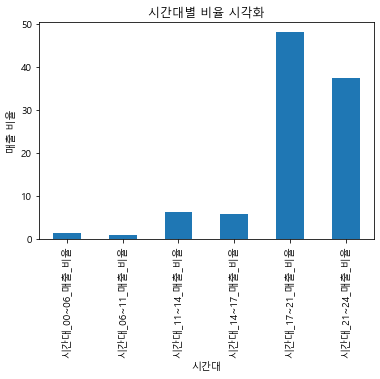

치킨전문점


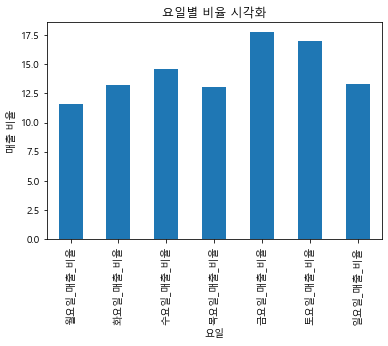

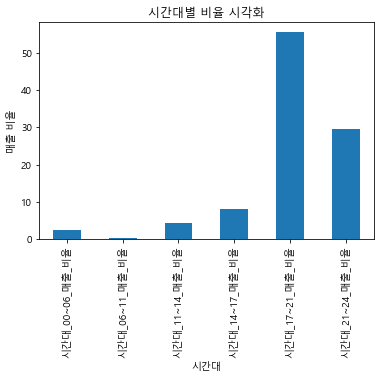

조명용품


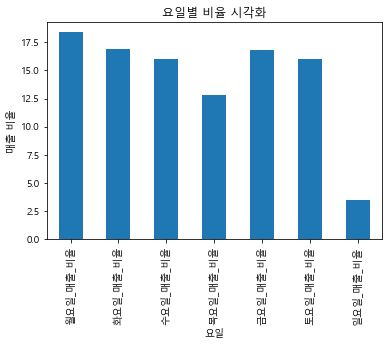

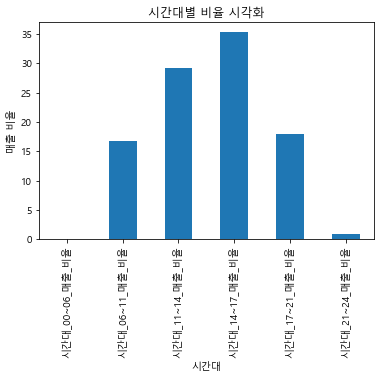

철물점


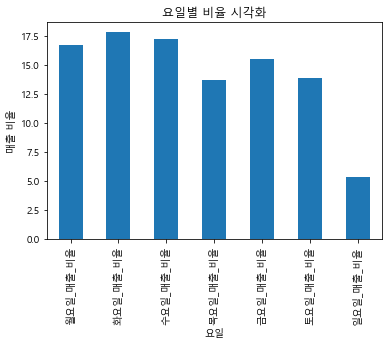

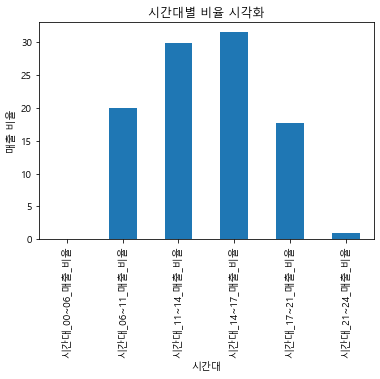

애완동물


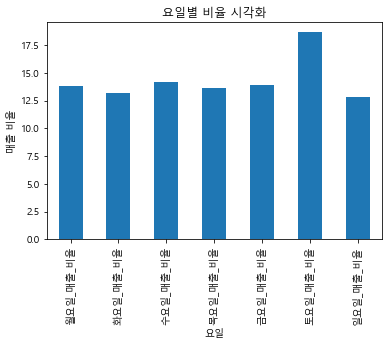

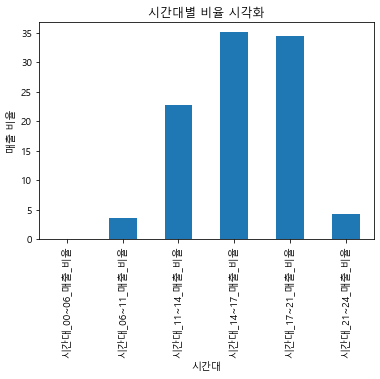

서적


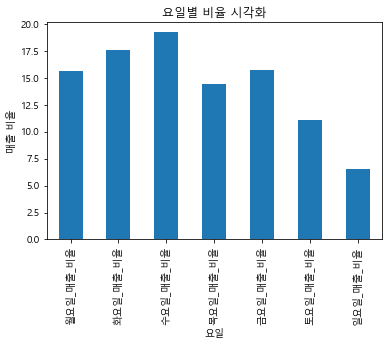

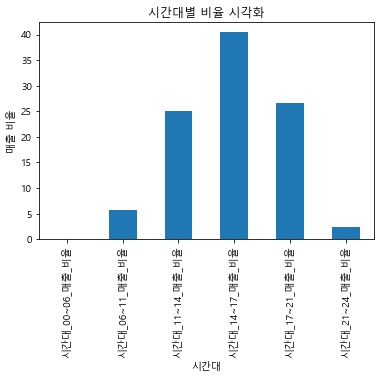

청과상


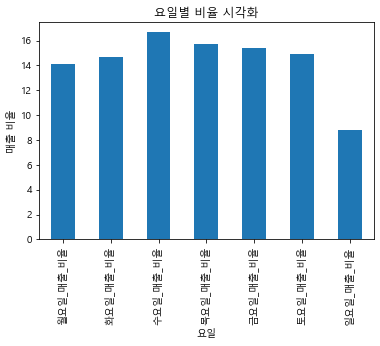

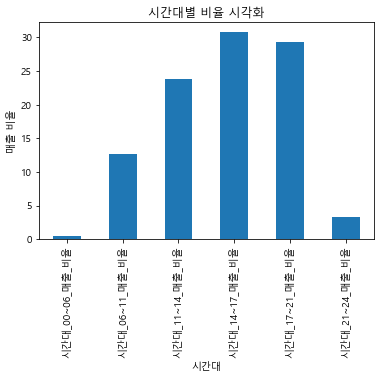

수산물판매


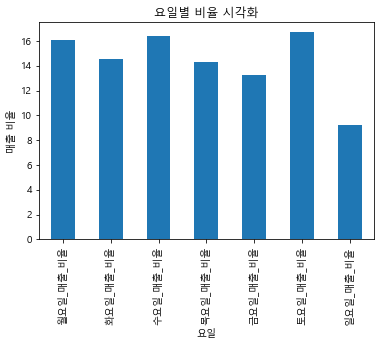

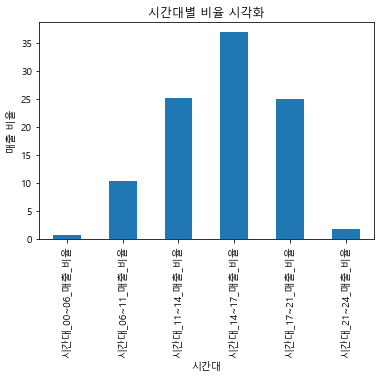

미곡판매


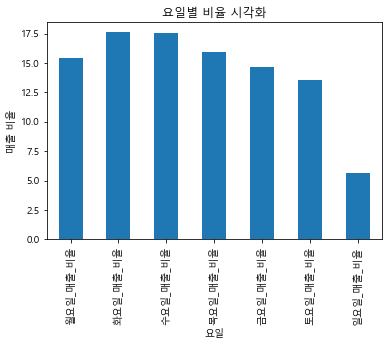

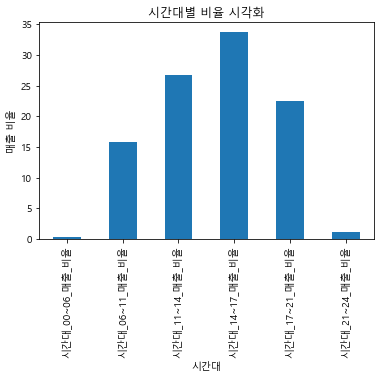

가전제품수리


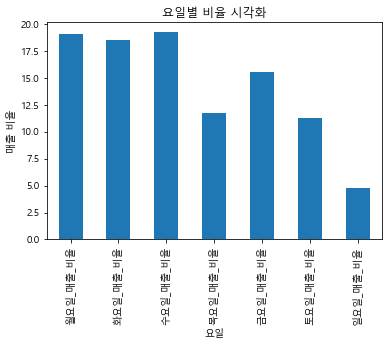

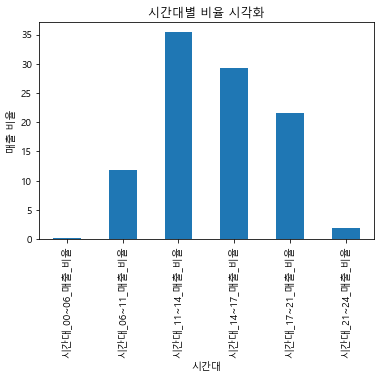

예술학원


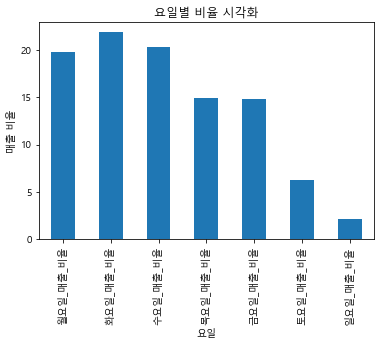

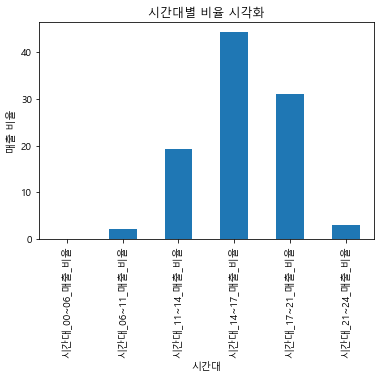

외국어학원


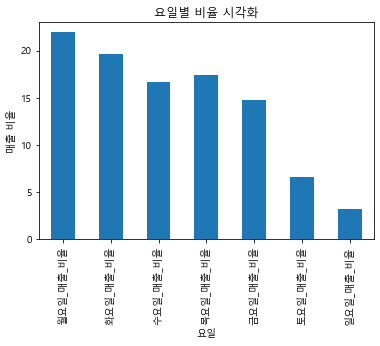

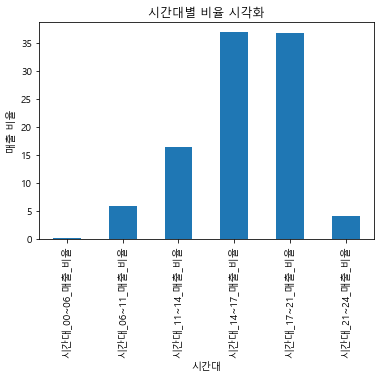

일반교습학원


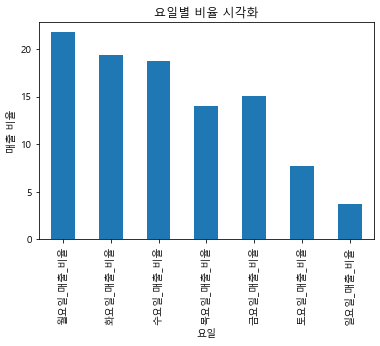

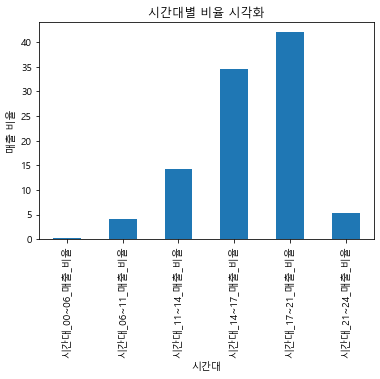

자동차미용


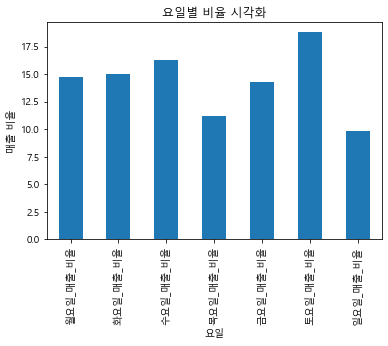

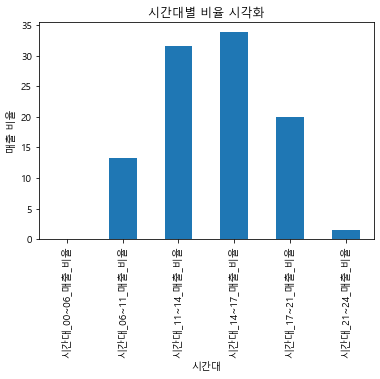

자전거 및 기타운송장비


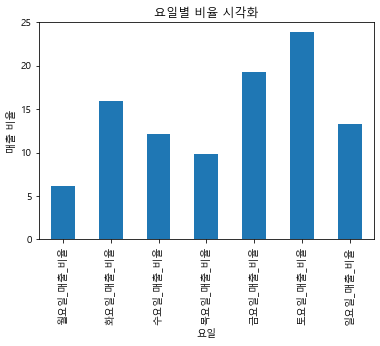

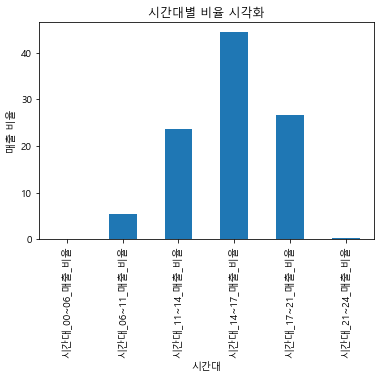

부동산중개업


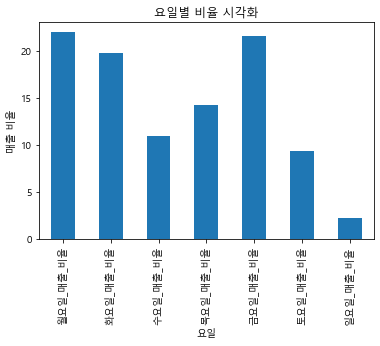

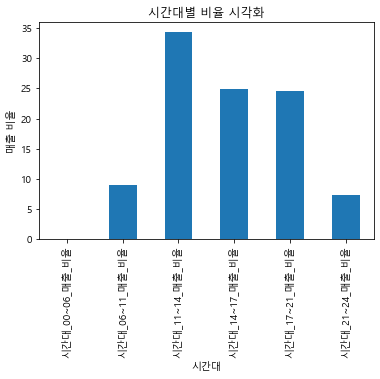

In [10]:
for i in range(0,63):
    a=q1_2021['서비스_업종_코드_명']==q1_2021['서비스_업종_코드_명'].unique()[i]
    b=q1_2021[a]
    b=b.iloc[:,10:] # 슬라이싱
    b_mean=b.mean()
    
    print(q1_2021['서비스_업종_코드_명'].unique()[i])
    # 요일별로 매출 비율 시각화
    b_mean[2:9].plot(kind='bar')
    plt.title('요일별 비율 시각화')
    plt.xlabel('요일')
    plt.ylabel('매출 비율')
    plt.xticks()
    plt.show()
    
    # 시간대
    b_mean[9:15].plot(kind='bar')
    plt.title('시간대별 비율 시각화')
    plt.xlabel('시간대')
    plt.ylabel('매출 비율')
    plt.show()